Author: Dovydas Valiulis 436254

# Lab session week 4: Analysis and cleaning

In this lab session you will learn how to work with analysing, cleaning and preprocessing data. You will use the kNN classifier in the end.

This weeks lab session consists of 5 small exercises:
1. Analysing your data
2. Imputation of missing values
3. Dealing with outliers
3. Preprocessing
4. Classification with kNN

In [182]:
from IPython.display import HTML
import matplotlib
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

## Exercise 1: analysing data with Pandas
During this exercise we will use the dataset `housedata.csv`. Please watch the following video to understand the describe function of Pandas:

In [183]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/MaTAhxRsshE" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

C:\Users\Dovydas\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


This exercise will use a dataset that has been created using this dataset from Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). It might be useful to look up the column information for each of the columns in your own dataset before you proceed.

Now it is time to analyse our own dataset `housedata.csv`. Please do the following exercises:
1. Load your data into a dataframe
2. Have a look at the statistics using the describe function (hint: use include = 'all') and answer the following questions
    - Does your dataset have missing values?
    - Are their outliers?
    - How is the distribution of your data (hint: use plots)?

In [184]:
# Your code here
data = pd.read_csv('housedata.csv', sep=',')
df = pd.DataFrame(data)
df

,LotArea,LotFrontage,BldgType,OverallQual,OverallCond,YearBuilt,HeatingQC,Label
0,8450,65.0,1Fam,7.0,5,2003,Ex,normal
1,9600,80.0,1Fam,6.0,8,1976,Ex,normal
2,11250,68.0,1Fam,7.0,5,2001,Ex,expensive
3,9550,60.0,1Fam,7.0,5,1915,Gd,normal
4,14260,84.0,1Fam,8.0,5,2000,Ex,expensive
...,...,...,...,...,...,...,...,...
1455,7917,62.0,1Fam,6.0,5,1999,Ex,normal
1456,13175,85.0,1Fam,6.0,6,1978,TA,normal
1457,9042,66.0,NaN,7.0,9,1941,Ex,expensive
1458,9717,68.0,1Fam,5.0,6,1950,Gd,normal


In [185]:
df.describe()

,LotArea,LotFrontage,OverallQual,OverallCond,YearBuilt
count,1460.000000,1201.000000,1362.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,6.095448,5.575342,1934.567808
std,9981.264932,24.284752,1.386296,1.112799,300.142482
min,1300.000000,21.000000,1.000000,1.000000,-491.000000
25%,7553.500000,59.000000,5.000000,5.000000,1952.000000
50%,9478.500000,69.000000,6.000000,5.000000,1972.000000
75%,11601.500000,80.000000,7.000000,6.000000,2000.000000
max,215245.000000,313.000000,10.000000,9.000000,2457.000000


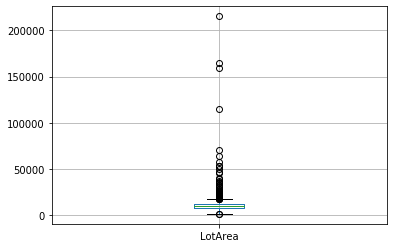

In [186]:
df.boxplot(column="LotArea")

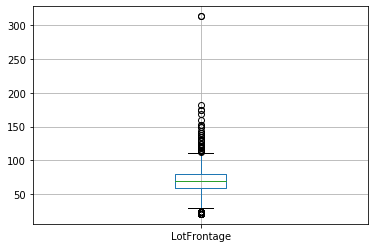

In [187]:
df.boxplot(column="LotFrontage")

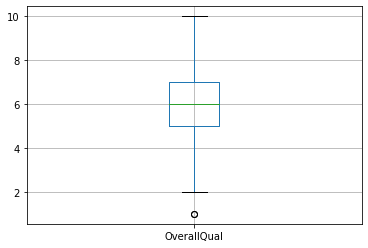

In [188]:
df.boxplot(column="OverallQual")

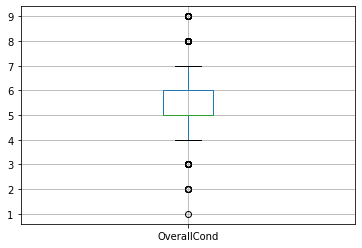

In [189]:
df.boxplot(column="OverallCond")

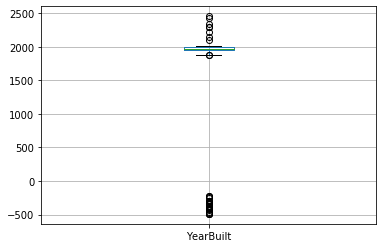

In [190]:
df.boxplot(column="YearBuilt")

In [191]:
df.isna().sum()

LotArea          0
LotFrontage    259
BldgType        82
OverallQual     98
OverallCond      0
YearBuilt        0
HeatingQC        0
Label            0
dtype: int64

In [192]:
df.isna().sum()/len(df)

LotArea        0.000000
LotFrontage    0.177397
BldgType       0.056164
OverallQual    0.067123
OverallCond    0.000000
YearBuilt      0.000000
HeatingQC      0.000000
Label          0.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205896DBB88>,
      dtype=object)

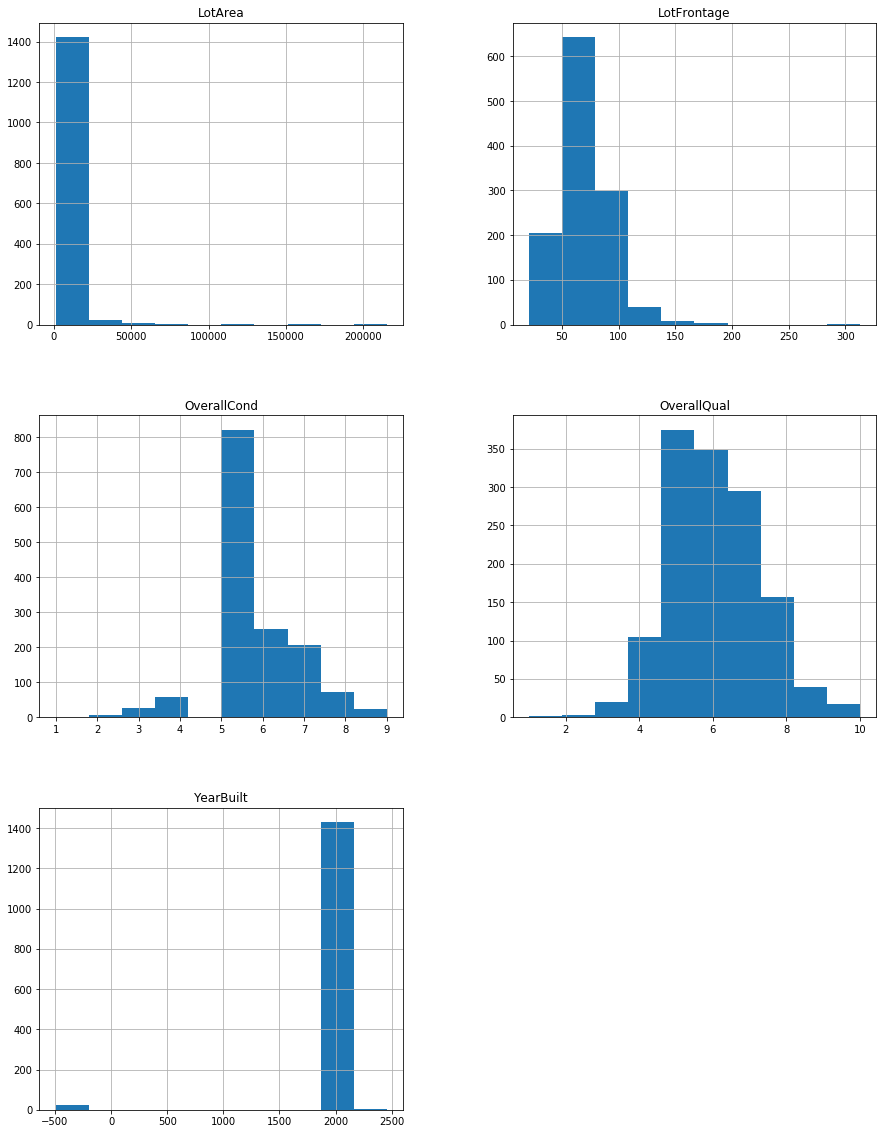

In [193]:
df.hist(figsize=(15,20))

**Your answers:**
- Does the data set have missing values? Which columns?
    - yes, LotFrontage, BldgType, OverallQual
- Does the data set have outliers? Which columns?
    - yes, YearBuilt, LotArea, LotFrontage
- How is the distribution of your data?
    - ...

## Exercise 2: Imputation
We will now fix the problem of missing values by using imputation. Please watch the following video to understand how imputation works:

In [194]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/D6saJ9R65L4" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

C:\Users\Dovydas\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Lets try to do imputation on our own dataset.

1. Impute missing values (mean, median or mode) depending on the earlier found statistics
2. Use the Scikit-learn framework for imputation (http://scikit-learn.org/stable/modules/impute.html)

In [195]:
# Impute missing values for numerical data using the imputer
from sklearn.impute import SimpleImputer

# Your code here

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['LotFrontage'] = imp.fit_transform(df[['LotFrontage']])
df.isna().sum()

LotArea         0
LotFrontage     0
BldgType       82
OverallQual    98
OverallCond     0
YearBuilt       0
HeatingQC       0
Label           0
dtype: int64

In [196]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df['OverallQual'] = imp.fit_transform(df[['OverallQual']])
df.isna().sum()

LotArea         0
LotFrontage     0
BldgType       82
OverallQual     0
OverallCond     0
YearBuilt       0
HeatingQC       0
Label           0
dtype: int64

In [197]:
# Impute missing values for categorical values using pandas operations

# Your code here
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['BldgType'] = imp.fit_transform(df[['BldgType']])
df.describe()

,LotArea,LotFrontage,OverallQual,OverallCond,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,6.089041,5.575342,1934.567808
std,9981.264932,22.024023,1.339142,1.112799,300.142482
min,1300.000000,21.000000,1.000000,1.000000,-491.000000
25%,7553.500000,60.000000,5.000000,5.000000,1952.000000
50%,9478.500000,70.049958,6.000000,5.000000,1972.000000
75%,11601.500000,79.000000,7.000000,6.000000,2000.000000
max,215245.000000,313.000000,10.000000,9.000000,2457.000000


## Exercise 3: Dealing with outliers
Since your dataset contains some outliers, we should fix this problem before proceeding to the next step. Read the following two (short) articles:
1. https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/
2. https://www.rapidinsightinc.com/handle-outliers/

Use the described techniques, find the outliers in your dataset and deal with them!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205898EB388>,
      dtype=object)

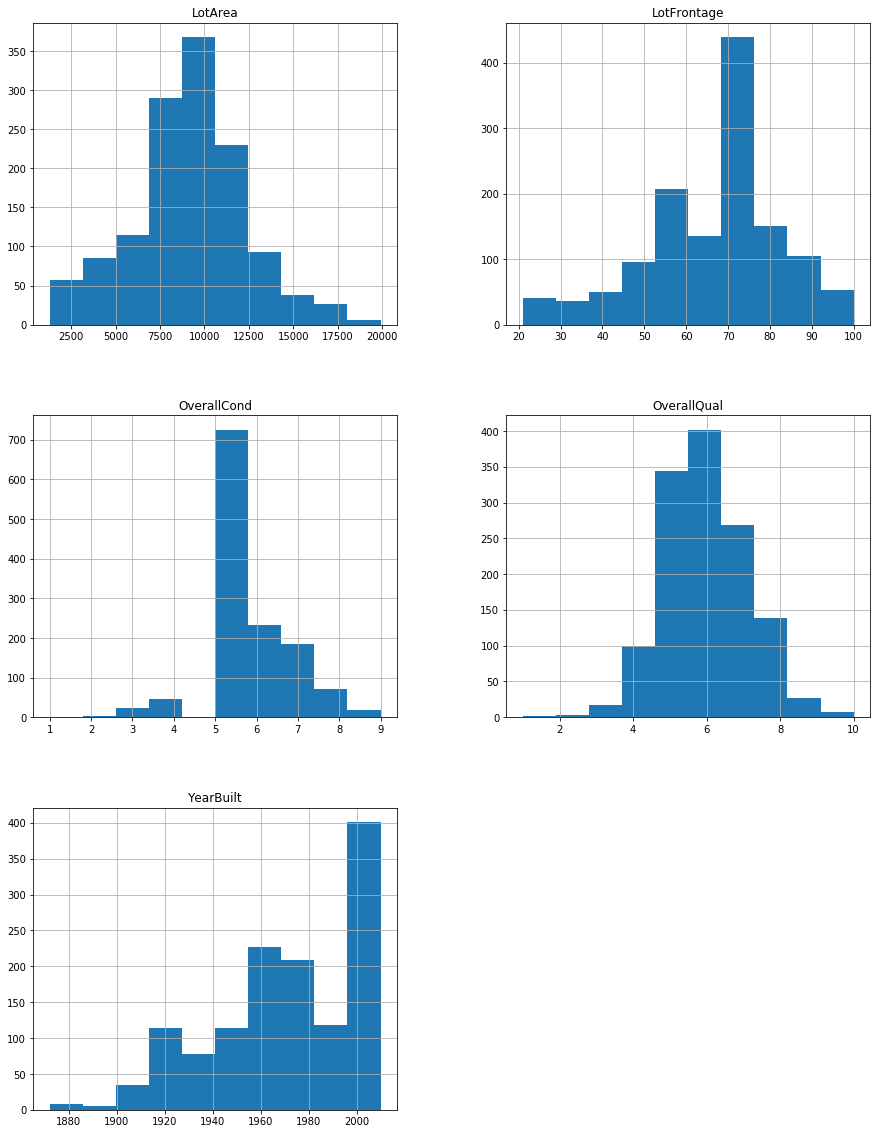

In [198]:
# Your code here

df = df.query('0<YearBuilt<=2020')
df = df.query('LotArea<=20000')
df = df.query('LotFrontage<=100')
df.hist(figsize=(15,20))

## Exercise 4: Preprocessing
In order to use the data we have to preprocess the data. We have to perform several steps to make the data ready for classification.

1. Apply one-hot-encoding on categorical features (use Scikit-learn or getDummies in Pandas (see: http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example))
2. Apply min-max-scaling or standardization (use Scikit-learn)

In [199]:
#1: Apply one hot encoding (using getdummies and concat?)

# Your code here
df = pd.concat([df,pd.get_dummies(df['BldgType'], prefix='BldgType')],axis=1)
df.drop(['BldgType'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['HeatingQC'], prefix='HeatingQC')],axis=1)
df.drop(['HeatingQC'],axis=1, inplace=True)

In [200]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

labels_encoded=le.fit_transform(df['Label'])
print(labels_encoded)

df.drop(['Label'],axis=1, inplace=True)

[2 2 1 ... 1 2 2]


In [201]:
df

,LotArea,LotFrontage,OverallQual,OverallCond,YearBuilt,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,8450,65.0,7.0,5,2003,1,0,0,0,0,1,0,0,0,0
1,9600,80.0,6.0,8,1976,1,0,0,0,0,1,0,0,0,0
2,11250,68.0,7.0,5,2001,1,0,0,0,0,1,0,0,0,0
3,9550,60.0,7.0,5,1915,1,0,0,0,0,0,0,1,0,0
4,14260,84.0,8.0,5,2000,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,6.0,5,1999,1,0,0,0,0,1,0,0,0,0
1456,13175,85.0,6.0,6,1978,1,0,0,0,0,0,0,0,0,1
1457,9042,66.0,7.0,9,1941,1,0,0,0,0,1,0,0,0,0
1458,9717,68.0,5.0,6,1950,1,0,0,0,0,0,0,1,0,0


In [236]:
#2: Apply min-max scaling or standardization
from sklearn.preprocessing import StandardScaler
# Your code here

scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.transform(df)
labels_encoded = labels_encoded.reshape(-2, 1)
scaled = np.hstack((scaled,labels_encoded))

[[-0.21685288 -0.10786306  0.753954   ... -0.02766064 -0.6565609
   2.        ]
 [ 0.14307467  0.84593295 -0.02317116 ... -0.02766064 -0.6565609
   2.        ]
 [ 0.65949247  0.08289614  0.753954   ... -0.02766064 -0.6565609
   1.        ]
 ...
 [-0.03156844 -0.04427666  0.753954   ... -0.02766064 -0.6565609
   1.        ]
 [ 0.17969339  0.08289614 -0.80029633 ... -0.02766064 -0.6565609
   2.        ]
 [ 0.24854909  0.52800095 -0.80029633 ... -0.02766064 -0.6565609
   2.        ]]


## Exercise 5: Classification
1. Split the dataset in two parts (75%/25%) for training and testing.
2. Use the kNN algorithm from Scikit-learn and train a classifier
3. Validate using your testset
4. Play around with several hyperparameters to optimize your classification results

**Warning: this dataset will probably not give you great classification results (around 70% score)**

In [246]:
# Your code here
from sklearn.model_selection import train_test_split
train, test= train_test_split(scaled, test_size=0.25, random_state=0)
print(len(train))
print(len(test))
print(train.shape)

981
327
(981, 16)


In [247]:
train_labels = train[:,15]
test_labels = test[:,15]

train = train[:,0:15]
test = test[:,0:15]

array([[-1.86626002, -2.33338708,  0.753954  , ..., -0.44967308,
        -0.02766064, -0.6565609 ],
       [-1.62088332, -1.57035027, -0.02317116, ...,  2.2238378 ,
        -0.02766064, -0.6565609 ],
       [ 0.06076081,  0.14648254, -0.02317116, ..., -0.44967308,
        -0.02766064, -0.6565609 ],
       ...,
       [ 0.21881595, -0.99807267, -0.02317116, ..., -0.44967308,
        -0.02766064, -0.6565609 ],
       [ 0.26826687,  1.29103775, -0.02317116, ..., -0.44967308,
        -0.02766064,  1.52308797],
       [-0.69852984, -0.42579506, -0.80029633, ..., -0.44967308,
        -0.02766064,  1.52308797]])

In [249]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(train,train_labels)

predicted= model.predict(test) # 0:Overcast, 2:Mild
print(predicted)
print(test_labels)

[0. 1. 2. 2. 2. 0. 1. 2. 2. 1. 0. 0. 2. 1. 2. 1. 0. 1. 2. 2. 2. 0. 0. 2.
 0. 2. 0. 2. 2. 2. 1. 2. 0. 0. 2. 2. 0. 2. 0. 2. 0. 1. 1. 0. 0. 2. 2. 2.
 0. 1. 0. 2. 1. 0. 2. 0. 2. 0. 2. 0. 0. 0. 1. 2. 0. 2. 1. 0. 0. 2. 1. 0.
 2. 2. 1. 2. 2. 2. 2. 2. 0. 1. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 0. 2. 0. 2.
 2. 0. 2. 0. 0. 0. 1. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 0. 0. 2. 1. 2. 0. 2.
 1. 1. 2. 1. 0. 2. 2. 0. 2. 0. 0. 0. 0. 2. 0. 2. 2. 0. 2. 2. 2. 2. 2. 0.
 2. 2. 0. 2. 2. 2. 0. 0. 1. 0. 2. 0. 0. 0. 2. 0. 1. 2. 0. 2. 0. 2. 2. 2.
 0. 0. 2. 0. 1. 2. 2. 2. 2. 0. 0. 0. 2. 0. 2. 2. 1. 1. 0. 1. 1. 2. 1. 2.
 0. 0. 1. 2. 2. 2. 1. 1. 0. 2. 0. 0. 1. 2. 1. 2. 2. 0. 2. 0. 0. 2. 2. 2.
 1. 0. 0. 0. 2. 1. 0. 1. 2. 2. 0. 2. 2. 0. 0. 0. 2. 2. 2. 1. 1. 2. 2. 0.
 0. 2. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 2. 1. 0. 1. 2. 1. 2. 0. 2.
 2. 0. 0. 2. 2. 1. 1. 2. 0. 2. 2. 2. 0. 0. 2. 1. 0. 2. 1. 2. 2. 0. 0. 0.
 2. 2. 2. 1. 0. 1. 1. 1. 0. 1. 0. 0. 2. 1. 1. 1. 0. 1. 2. 0. 2. 1. 2. 1.
 0. 2. 1. 2. 0. 2. 2. 0. 0. 0. 2. 2. 2. 2. 2.]
[0. 

In [251]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1).fit(train, train_labels)
clf.score(test, test_labels)

0.7859327217125383